## Importing necessary libraries

In [258]:
import re
import string
import random
from __future__ import unicode_literals
from nltk.corpus import words
import matplotlib.pyplot as plt

In [259]:
# Set figure size
fig_size = [0,0]
fig_size[0] = 7
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

## 1.1 English Text

In [260]:
# Importing English text, The Holy Bible
# A dictionary to maintain the word counts
en_dict = {}
with open("English.txt",encoding="utf-8") as text:
    for line in text:
        # We do not care for case, so move to lower case, and also remove all punctuations and all numbers
        line = line.lower()
        line = re.sub('['+string.punctuation+']', ' ', line)
        line = re.sub('[0-9]','',line)
        temp = line.split()
        for word in temp:
            if word not in en_dict:
                en_dict[word] = 1
            else:
                en_dict[word] += 1
print('Number of tokens in English Text:',len(en_dict))

Number of tokens in English Text: 12498


In [270]:
# Setting up the ranges to use for plotting
en_x_range = len(en_dict)
#en_x_range = len(set(en_dict.values()))
en_y_range = list(sorted(en_dict.values(), reverse=True))
#en_y_range = list(sorted(list(set(en_dict.values())), reverse=True))
#print(y_range)

In [271]:
# Displaying the top 50 tokens from the text
sorted_en = sorted( ((v,k) for k,v in en_dict.items()), reverse=True)
print("Printing top 50 tokens:\n",sorted_en[:50])

Printing top 50 tokens:
 [(63925, 'the'), (51704, 'and'), (34615, 'of'), (13558, 'to'), (12915, 'that'), (12666, 'in'), (10421, 'he'), (9838, 'shall'), (8997, 'unto'), (8970, 'for'), (8857, 'i'), (8472, 'his'), (8182, 'a'), (7965, 'lord'), (7376, 'they'), (7012, 'be'), (6989, 'is'), (6660, 'him'), (6596, 'not'), (6428, 'them'), (6127, 'it'), (6012, 'with'), (5619, 'all'), (5474, 'thou'), (4602, 'thy'), (4525, 'was'), (4471, 'god'), (4413, 'which'), (4368, 'my'), (4096, 'me'), (3997, 'said'), (3993, 'but'), (3984, 'ye'), (3931, 'their'), (3910, 'have'), (3837, 'will'), (3826, 'thee'), (3642, 'from'), (3520, 'as'), (2951, 'are'), (2834, 'when'), (2788, 'this'), (2774, 'were'), (2774, 'out'), (2746, 'upon'), (2736, 'man'), (2625, 'by'), (2615, 'you'), (2577, 'israel'), (2540, 'king')]


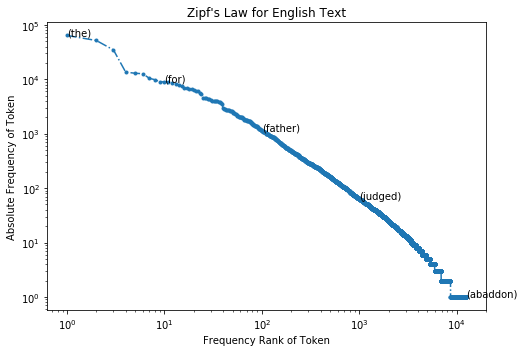

In [273]:
# Plotting the distribution in log-log scale
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency Rank of Token')
plt.ylabel('Absolute Frequency of Token')
plt.title("Zipf's Law for English Text")
plt.tight_layout()
plt.plot(range(1,en_x_range+1),en_y_range,'-..')
A = [1, 10, 100, 1000, en_x_range]
B = [en_y_range[0],en_y_range[9], en_y_range[99], en_y_range[999],en_y_range[en_x_range-1]]
for xy in zip(A, B):                                       # <--
    plt.annotate('(%s)' % (sorted_en[xy[0]-1][1]), xy=xy, textcoords='data') # <--
plt.show()

## 1.1 German Text

In [206]:
# We do the same as above for German translation of The Holy Bible
de_dict = {}
with open("German.txt",encoding="utf-8") as text:
    for line in text:
        if (re.match('.+',line)):
            line = line.lower()
            #line = line.lower()
            line = re.sub('['+string.punctuation+']', ' ', line)
            line = re.sub('[0-9]','',line)
            temp = line.split()
        
            for word in temp:
                if word not in de_dict:
                    de_dict[word] = 1
                else:
                    de_dict[word] += 1
print("Number of tokens in German text:",len(de_dict))

Number of tokens in German text: 20310


In [207]:
de_x_range = len(de_dict)
de_y_range = list(sorted(de_dict.values(), reverse=True))

In [208]:
# The top 50 German tokens
sorted_de = sorted( ((v,k) for k,v in de_dict.items()), reverse=True)
print(sorted_de[:50])

[(46387, 'und'), (18752, 'der'), (16602, 'die'), (10085, 'zu'), (9814, 'sie'), (8748, 'den'), (8736, 'er'), (8711, 'das'), (8114, 'ich'), (8044, 'daß'), (7590, 'nicht'), (7023, 'in'), (6989, 'des'), (6881, 'dem'), (6689, 'ist'), (5998, 'aber'), (5946, 'von'), (5452, 'da'), (5450, 'auf'), (5436, 'mit'), (5328, 'du'), (5170, 'denn'), (4920, 'ein'), (4777, 'ihr'), (4552, 'herr'), (4442, 'es'), (4416, 'so'), (3897, 'an'), (3770, 'sprach'), (3748, 'herrn'), (3472, 'wird'), (3441, 'ihm'), (3375, 'wie'), (3322, 'sich'), (3225, 'sein'), (2978, 'hat'), (2978, 'euch'), (2921, 'gott'), (2867, 'vor'), (2796, 'ihn'), (2590, 'werden'), (2520, 'war'), (2469, 'mir'), (2416, 'will'), (2405, 'aus'), (2372, 'auch'), (2354, 'was'), (2294, 'sind'), (2291, 'dir'), (2269, 'ihnen')]


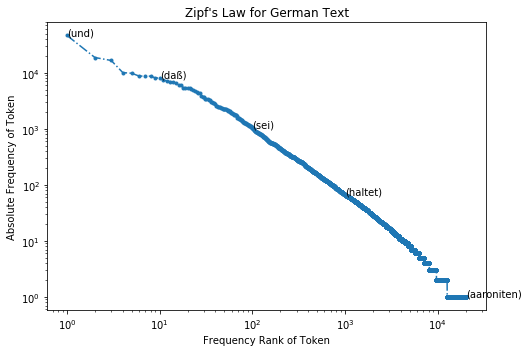

In [209]:
# Plot
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency Rank of Token')
plt.ylabel('Absolute Frequency of Token')
plt.title("Zipf's Law for German Text")
plt.tight_layout()
de, = plt.plot(range(1,de_x_range+1),de_y_range,'-..',label='German')
#plt.legend(handles=[de,])
A = [1, 10, 100, 1000, de_x_range]
B = [de_y_range[0],de_y_range[9], de_y_range[99], de_y_range[999],de_y_range[de_x_range-1]]
for xy in zip(A, B):                                       # <--
    plt.annotate('(%s)' % (sorted_de[xy[0]-1][1]), xy=xy, textcoords='data') # <--
#plt.annotate()
plt.show()

## 1.1 Esperanto Text

In [210]:
# Now for Esperanto
esp_dict = {}
with open("Esperanto.txt",encoding="utf-8") as text:
    for line in text:
        if (re.match('.+',line)):
            line = line.lower()
            line = re.sub('['+string.punctuation+']', ' ', line)
            line = re.sub('[0-9]', '', line)
            temp = line.split()
            for word in temp:
                if word not in esp_dict:
                    esp_dict[word] = 1
                else:
                    esp_dict[word] += 1
print("Number of words in Esperanto:",len(esp_dict))

Number of words in Esperanto: 26885


In [211]:
esp_x_range = len(esp_dict)
esp_y_range = list(sorted(esp_dict.values(), reverse=True))

In [212]:
# Print top 50 tokens
sorted_esp = sorted( ((v,k) for k,v in esp_dict.items()), reverse=True)
print(sorted_esp[:50])

[(57772, 'la'), (48256, 'kaj'), (27915, 'de'), (17266, 'al'), (12554, 'li'), (11993, 'en'), (11621, 'vi'), (11508, 'mi'), (8885, 'ne'), (8437, 'ili'), (8333, 'estas'), (6847, 'por'), (6632, 'eternulo'), (5090, 'ke'), (4808, 'el'), (4559, 'sur'), (4495, 'diris'), (4421, 'kiu'), (4258, 'cxar'), (4116, 'sed'), (3749, 'estis'), (3717, 'dio'), (3632, 'per'), (3603, 'kiel'), (3356, 'via'), (3210, 'kun'), (2968, 'tiu'), (2869, 'ni'), (2740, 'mia'), (2511, 'kiam'), (2426, 'antaux'), (2400, 'lin'), (2387, 'vin'), (2351, 'kiuj'), (2310, 'cxiuj'), (2300, 'regxo'), (2267, 'gxi'), (2189, 'lia'), (2174, 'ilin'), (1941, 'estos'), (1933, 'tio'), (1933, 'filo'), (1919, 'pri'), (1910, 'sia'), (1897, 'se'), (1856, 'cxi'), (1842, 'tiam'), (1708, 'oni'), (1699, 'pro'), (1694, 'min')]


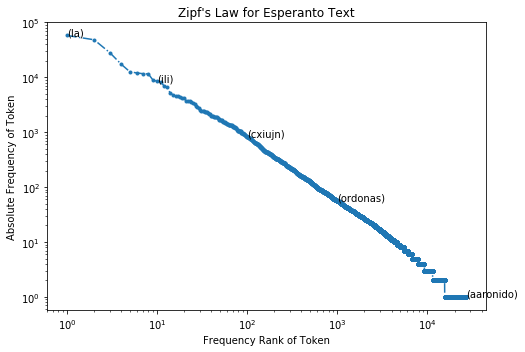

In [213]:
# Plot
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency Rank of Token')
plt.ylabel('Absolute Frequency of Token')
plt.title("Zipf's Law for Esperanto Text")
plt.tight_layout()
esp, = plt.plot(range(1,esp_x_range+1),esp_y_range,'-..', label='Esperanto')
#en, = plt.plot(range(1, en_x_range+1),en_y_range, '-', label='English')
A = [1, 10, 100, 1000, esp_x_range]
B = [esp_y_range[0],esp_y_range[9], esp_y_range[99], esp_y_range[999], esp_y_range[esp_x_range-1]]
for xy in zip(A, B):                                       # <--
    plt.annotate('(%s)' % (sorted_esp[xy[0]-1][1]), xy=xy, textcoords='data') # <--
#plt.legend(handles=[esp,])
plt.show()

## 1.1 French Text

In [214]:
# We do it for French text.
fr_dict = {}
with open("French.txt",encoding="utf-8") as text:
    for line in text:
        if (re.match('.+',line)):
            line = line.lower()
            #temp = line.split()
            line = line.lower()
            line = re.sub('['+string.punctuation+']', ' ', line)
            line = re.sub('[0-9]','',line)
            temp = line.split()
            for word in temp:
                if word not in fr_dict:
                    fr_dict[word] = 1
                else:
                    fr_dict[word] += 1
print("Number of tokens in French text:",len(fr_dict))

Number of tokens in French text: 20446


In [215]:
fr_x_range = len(fr_dict)
fr_y_range = list(sorted(fr_dict.values(), reverse=True))

# Print top 50 tokens
sorted_fr = sorted( ((v,k) for k,v in fr_dict.items()), reverse=True)
print(sorted_fr[:50])

[(33098, 'de'), (32005, 'et'), (19123, 'la'), (18140, 'l'), (17817, 'le'), (16909, 'les'), (13718, 'à'), (13119, 'il'), (10108, 'qui'), (9617, 'des'), (9491, 'd'), (9115, 'que'), (7823, 'est'), (7807, 'en'), (7203, 'je'), (7114, 'vous'), (6996, 'éternel'), (6826, 'dans'), (6288, 'pour'), (6284, 'un'), (6239, 'ne'), (6120, 'ils'), (5909, 'du'), (5517, 'tu'), (4770, 'qu'), (4747, 'ce'), (4717, 'a'), (4547, 'pas'), (4277, 'lui'), (4268, 'sur'), (4177, 'dieu'), (4172, 'fils'), (3919, 'dit'), (3871, 'se'), (3819, 'au'), (3808, 'une'), (3534, 'n'), (3510, 'son'), (3504, 'nous'), (3349, 'avec'), (3286, 's'), (3115, 'car'), (3031, 'par'), (2960, 'ses'), (2956, 'sa'), (2925, 'comme'), (2889, 'leur'), (2603, 'israël'), (2592, 'mais'), (2562, 'roi')]


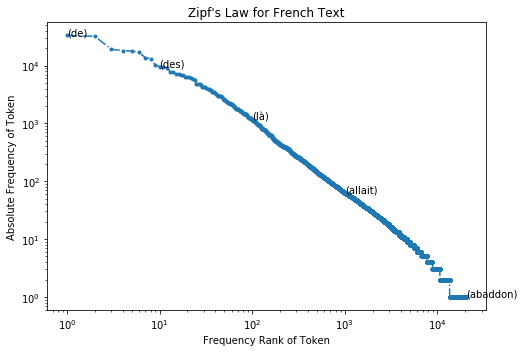

In [216]:
# Plot
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency Rank of Token')
plt.ylabel('Absolute Frequency of Token')
plt.title("Zipf's Law for French Text")
plt.tight_layout()
one, = plt.plot(range(1,fr_x_range+1),fr_y_range,'-..', label='French')
#two, = plt.plot(range(1,en_x_range+1),en_y_range,'-', label='English')
#plt.legend(handles=[one,])
A = [1, 10, 100, 1000, fr_x_range]
B = [fr_y_range[0],fr_y_range[9], fr_y_range[99], fr_y_range[999], fr_y_range[fr_x_range-1]]
for xy in zip(A, B):                                       # <--
    plt.annotate('(%s)' % (sorted_fr[xy[0]-1][1]), xy=xy, textcoords='data') # <--
plt.show()

## 1.1 Kannada Text

In [217]:
# Now we see it for a Dravidian language, Kannada
ka_dict = {}
with open("Kannada.txt",encoding="utf-8") as text:
    for line in text:
        if (re.match('.+',line)):
            line = line.lower()
            line = re.sub('['+string.punctuation+']', ' ', line)
            line = re.sub('[0-9]','',line)
            temp = line.split()
            for word in temp:
                if word not in ka_dict:
                    ka_dict[word] = 1
                else:
                    ka_dict[word] += 1
print("Number of tokens in Kannada text:",len(ka_dict))

Number of tokens in Kannada text: 80038


In [218]:
ka_x_range = len(ka_dict)
ka_y_range = list(sorted(ka_dict.values(), reverse=True))
# Top 50 Kannada tokens
sorted_ka = sorted( ((v,k) for k,v in ka_dict.items()), reverse=True) 
print(sorted_ka[:50])

[(5721, 'ನಿನ್ನ'), (5505, 'ನಾನು'), (5505, 'ನನ್ನ'), (4036, 'ತನ್ನ'), (3991, 'ಮೇಲೆ'), (3807, 'ಅವನು'), (3776, 'ಅವರು'), (3672, 'ನೀನು'), (3621, 'ಆಗ'), (3345, 'ಕರ್ತನು'), (3186, 'ಅವನ'), (3115, 'ಆದರೆ'), (3052, 'ಎಂದು'), (2948, 'ಆ'), (2669, 'ನೀವು'), (2496, 'ಈ'), (2453, 'ಅವರ'), (2338, 'ಅಂದನು'), (2172, 'ನಿಮ್ಮ'), (2165, 'ಕರ್ತನ'), (2120, 'ಹಾಗೆ'), (2111, 'ಆತನು'), (1721, 'ಸಂಗಡ'), (1619, 'ನನಗೆ'), (1573, 'ಅದರ'), (1527, 'ಎಲ್ಲಾ'), (1514, 'ಅದನ್ನು'), (1489, 'ಅವರಿಗೆ'), (1469, 'ಆತನ'), (1451, 'ತಮ್ಮ'), (1451, 'ಅವನಿಗೆ'), (1427, 'ಮತ್ತು'), (1383, 'ನಮ್ಮ'), (1371, 'ನಿನಗೆ'), (1366, 'ನನ್ನನ್ನು'), (1366, 'ಇಗೋ'), (1351, 'ಒಂದು'), (1339, 'ಮುಂದೆ'), (1316, 'ಬಳಿಗೆ'), (1311, 'ನಾವು'), (1302, 'ಅದು'), (1258, 'ಅವರನ್ನು'), (1224, 'ಇದಲ್ಲದೆ'), (1220, 'ದೇವರ'), (1213, 'ಅವನನ್ನು'), (1207, 'ಯಾಕಂದರೆ'), (1195, 'ಮಗನಾದ'), (1147, 'ನಿಮಗೆ'), (1116, 'ನಿನ್ನನ್ನು'), (1075, 'ಬಂದು')]


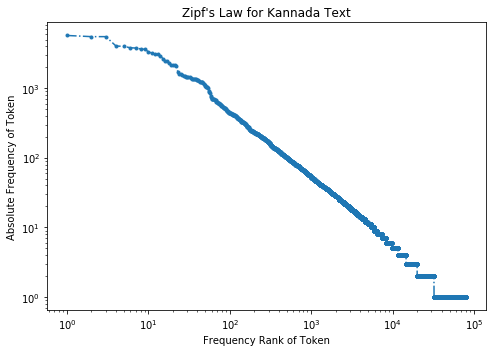

In [219]:
# Plot
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency Rank of Token')
plt.ylabel('Absolute Frequency of Token')
plt.title("Zipf's Law for Kannada Text")
plt.tight_layout()
one, = plt.plot(range(1,ka_x_range+1),ka_y_range,'-..', label='Kannada')
#plt.legend(handles=[one,])
plt.show()

## 1.1 Bengali Text

In [220]:
# Another Indic language, Bengali
be_dict = {}
with open("Bengali.txt",encoding="utf-8") as text:
    for line in text:
        if (re.match('.+',line)):
            line = line.lower()
            line = re.sub('['+string.punctuation+']', ' ', line)
            line = re.sub('[0-9]','',line)
            temp = line.split()
            for word in temp:
                if word not in be_dict:
                    be_dict[word] = 1
                else:
                    be_dict[word] += 1
print("Number of tokens in Bengali text:",len(be_dict))

Number of tokens in Bengali text: 36153


In [221]:
be_x_range = len(be_dict)
be_y_range = list(sorted(be_dict.values(), reverse=True))
# Top 50 Bengali tokens
sorted_be = sorted( ((v,k) for k,v in be_dict.items()), reverse=True)
print(sorted_be[:50])

[(8967, 'আমি'), (8623, 'এবং'), (7719, 'না'), (7353, 'করে'), (6507, 'আমার'), (6495, 'তাদের'), (6261, 'ও'), (5972, 'সেই'), (5945, 'এই'), (5619, 'তারা'), (5496, 'তোমাদের'), (5488, 'জন্য'), (5467, 'থেকে'), (5206, 'প্রভু'), (5018, 'তার'), (4485, 'য়ে'), (4463, 'কিন্তু'), (4376, 'তোমরা'), (4172, 'সে'), (4151, 'আর'), (3908, 'তাঁর'), (3906, 'তিনি'), (3744, 'করতে'), (3617, 'কাছে'), (3396, 'হবে'), (3393, 'ঈশ্বর'), (3279, 'তোমার'), (3240, 'সঙ্গে'), (3130, 'তখন'), (3075, 'তুমি'), (2986, 'তা'), (2804, 'করবে'), (2784, 'বললেন'), (2783, 'সব'), (2780, 'আমাদের'), (2770, 'ছিল'), (2748, 'লোকদের'), (2675, 'প্রভুর'), (2632, 'কথা'), (2615, 'নিয়ে'), (2507, 'সমস্ত'), (2438, 'ঈশ্বরের'), (2433, 'কি'), (2355, 'কোন'), (2259, 'যদি'), (2201, 'লোকরা'), (2149, 'যা'), (2132, 'আমরা'), (2094, 'দিয়ে'), (2089, 'এক')]


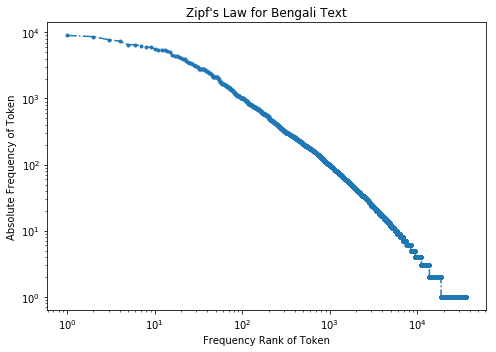

In [222]:
# Plot
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency Rank of Token')
plt.ylabel('Absolute Frequency of Token')
plt.title("Zipf's Law for Bengali Text")
plt.tight_layout()
one, = plt.plot(range(1,be_x_range+1),be_y_range,'-..', label='Bengali')
# plt.legend(handles=[one,])

plt.show()

## Plotting the distribution for multiple languages

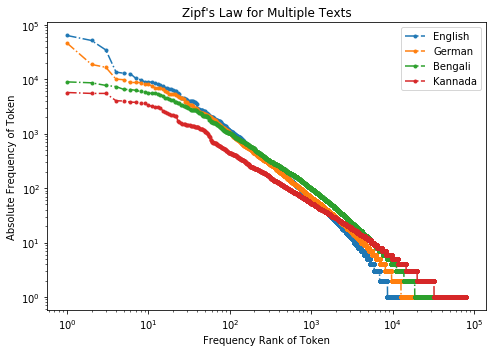

In [223]:
# Plot the distributions for multiple languages. Useful for visualization

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency Rank of Token')
plt.ylabel('Absolute Frequency of Token')
plt.title("Zipf's Law for Multiple Texts")
plt.tight_layout()

one,=plt.plot(range(1,en_x_range+1),en_y_range,'-..',label='English')
two,=plt.plot(range(1,de_x_range+1),de_y_range,'-..',label='German')
three,=plt.plot(range(1,be_x_range+1),be_y_range,'-..',label='Bengali')
four,=plt.plot(range(1,ka_x_range+1),ka_y_range,'-..',label='Kannada')
#five,=plt.plot(range(1,esp_x_range+1),esp_y_range,'-..',label='Esperanto')
plt.legend(handles=[one,two,three,four,])
plt.show()

## 2.1 Generating random English text

In [224]:
vowels = ['a','e','i','o','u']
all_ch = list(string.ascii_lowercase)
cons = [x for x in all_ch if x not in vowels]
others = cons+list(' ')
# Give the weightage according to the statement.
weights = [0.4] * len(vowels) + [0.6] * len(others)

In [225]:
# Get the max length of English word in the corpus. We will set this as the max limit.
max_l = -1
bl = ''
for w  in words.words():
    if len(w) > max_l:
        max_l = len(w)
        bl = w
print("Max Length of word in this corpus:",max_l,bl)

Max Length of word in this corpus: 24 formaldehydesulphoxylate


In [226]:
# Random generation of valid English words as is in the corpus of NLTK
vocab = []
list_words = []
count = 1000
# First we set all corpus words to lower case and store in vocab.
for w in words.words():
    vocab.append(w.lower())
vocab = list(set(vocab))
# Now generate 'count' number of words.
for _ in range(count):
    bleh = ''
    # While the random word is not a valid one, continue
    while bleh not in vocab:
        c = ''
        temp = ''
        while c != ' ' and len(temp) <= max_l:
            if temp != '' and temp[-1] not in vowels:
                c = random.choices(vowels+others,weights=weights)[0]
            else:
                c = random.choices(others)[0]
            temp += c
        bleh=temp.strip()
    list_words.append(bleh)
print("Done with generating!")

Done with generating!


In [227]:
# Counting the occurrences
a_dict = {}
for word in list_words:
    if word not in a_dict:
        a_dict[word] = 1
    else:
        a_dict[word] += 1

In [228]:
# Setting the ranges and showing the top 10 tokens
x_range = len(a_dict)
y_range = list(sorted(a_dict.values(), reverse=True))
print(sorted( ((v,k) for k,v in a_dict.items()), reverse=True)[:10])

[(50, 'f'), (48, 'j'), (43, 'k'), (42, 'x'), (42, 's'), (42, 'p'), (42, 'h'), (41, 'c'), (40, 'y'), (40, 'v')]


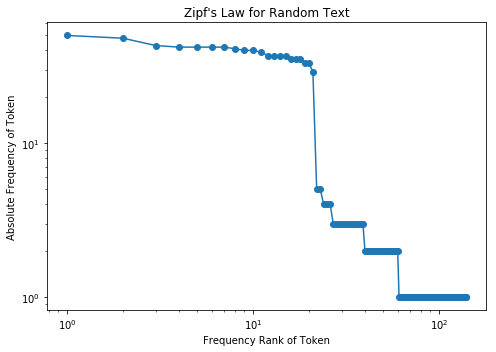

In [229]:
# Plot
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency Rank of Token')
plt.ylabel('Absolute Frequency of Token')
plt.title("Zipf's Law for Random Text")
plt.tight_layout()
plt.plot(range(1,x_range+1),y_range,'-o')
plt.show()

## 2.2 Showing probability of each character generated in the text.

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
[0.0378726833199033, 0.040290088638195005, 0.0443190975020145, 0.038678485092667206, 0.0249798549556809, 0.04915390813859791, 0.037066881547139406, 0.04915390813859791, 0.020950846091861403, 0.045124899274778404, 0.0378726833199033, 0.038678485092667206, 0.041901692183722805, 0.041901692183722805, 0.0265914585012087, 0.0443190975020145, 0.028203062046736505, 0.0427074939564867, 0.041901692183722805, 0.052377115229653506, 0.017727639000805803, 0.0346494762288477, 0.046736502820306204, 0.0346494762288477, 0.0499597099113618, 0.032232070910556]


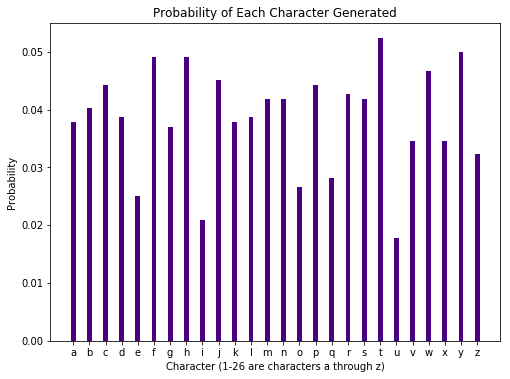

In [230]:
# Check probabilities of each character generated..
text = ""
for w in list_words:
    text += w
total = len(text)
dict_counts = {}
count_ch = []
list_ch = list(string.ascii_lowercase )
for c in list_ch:
    dict_counts[c] = text.count(c) / total
    count_ch.append(text.count(c) / total)
print(list_ch)
print(count_ch)
plt.bar(range(1,len(list_ch)+1),count_ch,width=0.3,color='indigo')
plt.tight_layout()
plt.xlabel('Character (1-26 are characters a through z)')
plt.ylabel('Probability')
# xticks allows us to show all the bars.
plt.xticks(range(1,len(list_ch)+1),list_ch)
plt.title('Probability of Each Character Generated')
plt.show()

## 2.1 Generating random text (may not be valid English text)

In [231]:
# We also see side-by-side the behavior if we generate completely random tokens, without a vocabulary check.
# Complete Random Text generation, without valid English words
len_text = int(1e6)
text_r = ''
#print(others)
for i in range(len_text):
    if text_r != '' and text_r[-1] not in vowels:
        text_r += random.choices(vowels+others,weights=weights)[0]
    else:
        text_r += random.choice(others)

In [232]:
a_dict = {}
for word in text_r.split():
    if word not in a_dict:
        a_dict[word] = 1
    else:
        a_dict[word] += 1

In [233]:
x_range = len(a_dict)
y_range = list(sorted(a_dict.values(), reverse=True))
# Print top 10 tokens
print(sorted( ((v,k) for k,v in a_dict.items()), reverse=True)[:10])

[(77, 'j'), (71, 'h'), (69, 't'), (69, 's'), (68, 'c'), (67, 'w'), (65, 'b'), (63, 'l'), (63, 'd'), (62, 'z')]


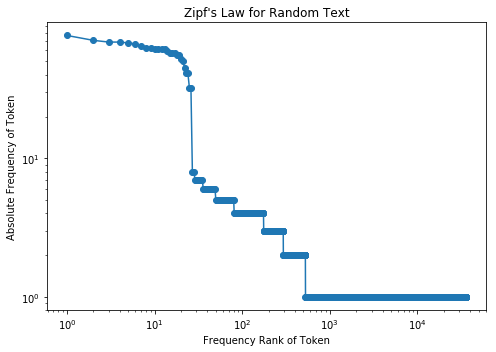

In [234]:
# Plot
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency Rank of Token')
plt.ylabel('Absolute Frequency of Token')
plt.title("Zipf's Law for Random Text")
plt.tight_layout()
plt.plot(range(1,x_range+1),y_range,'-o')
plt.show()

## 2.2 Checking probability distribution for such random generation

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
[0.024115537906708808, 0.04172248484835858, 0.04191520081003206, 0.041899575191518, 0.024254085057533528, 0.04170998435354733, 0.0417891541540186, 0.041802696356730784, 0.024098870580293804, 0.04175790291699046, 0.04174748583798109, 0.0418610319991833, 0.04179227927772141, 0.041933951552248945, 0.024209291617793203, 0.042012079644819275, 0.04230375785708184, 0.041725609972061393, 0.04194541033915926, 0.04155060304470385, 0.024428050276990132, 0.04202874697123428, 0.04197874499198927, 0.04176311145649515, 0.04203708063444178, 0.04161727235036387]


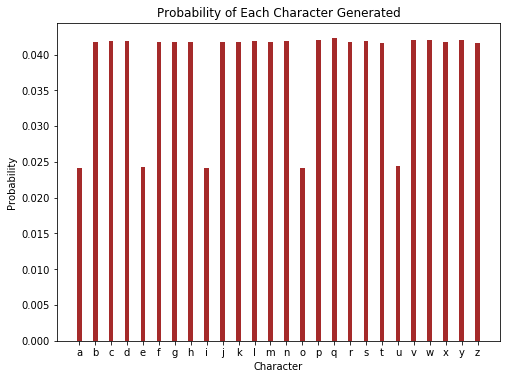

In [238]:
# Check probabilities of each character generated..
text_r = text_r.replace(' ','')
total = len(text_r)
dict_counts = {}
count_ch = []
list_ch = list(string.ascii_lowercase )

for c in list_ch:
    dict_counts[c] = text_r.count(c) / total
    count_ch.append(text_r.count(c) / total)

print(list_ch)
print(count_ch)
# range(1,len(list_ch)+1)

fig = plt.bar(range(len(list_ch)),count_ch,width=0.3,color='brown')
plt.tight_layout()
plt.xlabel('Character')
plt.ylabel('Probability')
plt.xticks(range(len(list_ch)),list_ch)
plt.title('Probability of Each Character Generated')
#fig.set_size(18,10)
plt.show()

## 2.3 Generating random text with probability dependent on previous text used. Here we check for valid English words.

In [239]:
# Generating text for Ron
# Get the probability distribution of the words as is in the English.txt used earlier.
list_ch = list(' ' + string.ascii_lowercase )
cnt_ch = {}
with open("English.txt",encoding="utf-8") as text:
    for line in text:
        line = line.lower()
        for c in line:
            if c in list_ch:
                if c in cnt_ch:
                    cnt_ch[c] += 1
                else:
                    cnt_ch[c] = 1
print(cnt_ch)
# Generating relative probabilities
tot = sum(cnt_ch.values())
prob_ch = []
for c in list_ch:
    prob_ch.append(cnt_ch[c] / tot)
print(list_ch)
print(prob_ch)

{'i': 192840, 'n': 223953, ' ': 758535, 't': 316030, 'h': 282019, 'e': 410120, 'b': 48562, 'g': 54856, 'o': 241601, 'd': 157553, 'c': 54430, 'r': 169124, 'a': 274641, 'v': 30253, 'w': 65217, 's': 189142, 'u': 82946, 'f': 83092, 'm': 79534, 'k': 22110, 'p': 42742, 'l': 129353, 'y': 58247, 'x': 1450, 'j': 8779, 'z': 2957, 'q': 953}
[' ', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
[0.19053694274283672, 0.06898726689188425, 0.012198323101079893, 0.013672310168275166, 0.03957584942021417, 0.10301833265135056, 0.020871938205076615, 0.01377931740934967, 0.0708405519262685, 0.04843961588921887, 0.0022052032145377124, 0.005553826526190775, 0.03249227148993014, 0.01997820167046844, 0.056254912348258836, 0.06068792594094155, 0.010736393187808509, 0.00023938474353052056, 0.04248237708799135, 0.04751071265566602, 0.07938379905346318, 0.020835264361891457, 0.007599272451236976, 0.016381904321962182, 0.000364226524

## Checking the probabilty distribution of the Engish.txt

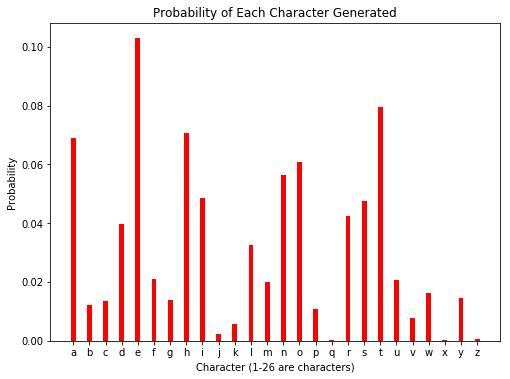

In [240]:
# Plot of the character distribution of the original text body
plt.bar(range(1,len(list_ch)),prob_ch[1:],width=0.3,color='red')
#plt.bar(range(1,len(list_ch)),prob_ch[1:])
plt.tight_layout()
plt.xlabel('Character (1-26 are characters)')
plt.ylabel('Probability')
plt.xticks(range(1,len(list_ch)),list_ch[1:])
plt.title('Probability of Each Character Generated')
plt.show()

## Generate the random text

In [241]:
# vocab = [] Already set above
list_words = []
count = 1000
# Already done above
# for w in words.words():
#     vocab.append(w.lower())
# vocab = list(set(vocab0
for _ in range(count):
    bleh = ''
    while bleh not in vocab:
        c = ''
        temp = ''
        while c != ' ' and len(temp) < max_l:
            c = random.choices(list_ch,weights=prob_ch)[0]
            temp += c
        bleh=temp.strip()
    list_words.append(bleh)
print("Done generating!")

Done generating!


In [242]:
a_dict = {}
for word in list_words:
    if word not in a_dict:
        a_dict[word] = 1
    else:
        a_dict[word] += 1

In [243]:
x_range = len(a_dict)
y_range = list(sorted(a_dict.values(), reverse=True))
# Top 10 tokens
print(sorted( ((v,k) for k,v in a_dict.items()), reverse=True)[:10])

[(83, 'e'), (76, 't'), (58, 'a'), (53, 'h'), (41, 'o'), (40, 's'), (39, 'n'), (39, 'i'), (32, 'd'), (28, 'l')]


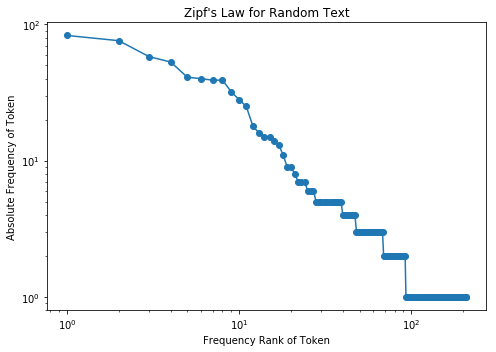

In [244]:
# Plot
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency Rank of Token')
plt.ylabel('Absolute Frequency of Token')
plt.title("Zipf's Law for Random Text")
plt.tight_layout()
one, = plt.plot(range(1,x_range+1),y_range,'-o', label='Random')
#plt.legend(handles=[one])
plt.show()

## Plotting probability distribution for the generated text

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
[0.13221476510067115, 0.008053691275167786, 0.009395973154362415, 0.04429530201342282, 0.1483221476510067, 0.019463087248322148, 0.012080536912751677, 0.07583892617449664, 0.06577181208053691, 0.0013422818791946308, 0.006711409395973154, 0.032214765100671144, 0.020134228187919462, 0.06442953020134229, 0.07785234899328859, 0.008053691275167786, 0.0, 0.04697986577181208, 0.05771812080536913, 0.10738255033557047, 0.02080536912751678, 0.004026845637583893, 0.019463087248322148, 0.0006711409395973154, 0.016778523489932886, 0.0]


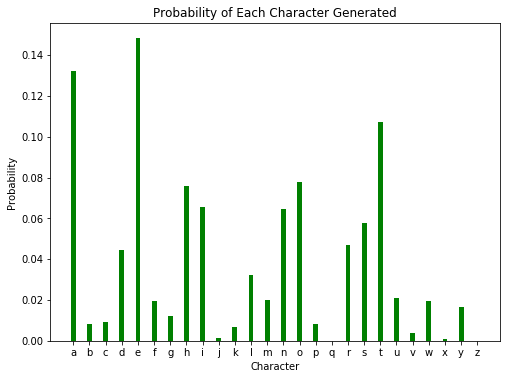

In [245]:
# We find out and plot the character distribution for the text that we have generated.
text = ""
for w in list_words:
    text += w
total = len(text)
dict_counts = {}
count_ch = []
list_ch = list(string.ascii_lowercase )

for c in list_ch:
    dict_counts[c] = text.count(c) / total
    count_ch.append(text.count(c) / total)

print(list_ch)
print(count_ch)
plt.bar(range(len(list_ch)),count_ch,width=0.3,color='green')
plt.tight_layout()
plt.xlabel('Character')
plt.ylabel('Probability')
plt.xticks(range(len(list_ch)),list_ch)
plt.title('Probability of Each Character Generated')
plt.show()

## 2.3 Now generating random text which may not produce proper English words.

In [252]:
# Same task, but now we see the effects of generation of completely random text, not proper English.
list_ch = list(' ' + string.ascii_lowercase )
cnt_ch = {}
with open("English.txt",encoding="utf-8") as text:
    for line in text:
        line = line.lower()
        for c in line:
            if c in list_ch:
                if c in cnt_ch:
                    cnt_ch[c] += 1
                else:
                    cnt_ch[c] = 1
print(cnt_ch)
# Generating relative probabilities
tot = sum(cnt_ch.values())
prob_ch = []
for c in list_ch:
    prob_ch.append(cnt_ch[c] / tot)
print(list_ch)
print(prob_ch)

{'i': 192840, 'n': 223953, ' ': 758535, 't': 316030, 'h': 282019, 'e': 410120, 'b': 48562, 'g': 54856, 'o': 241601, 'd': 157553, 'c': 54430, 'r': 169124, 'a': 274641, 'v': 30253, 'w': 65217, 's': 189142, 'u': 82946, 'f': 83092, 'm': 79534, 'k': 22110, 'p': 42742, 'l': 129353, 'y': 58247, 'x': 1450, 'j': 8779, 'z': 2957, 'q': 953}
[' ', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
[0.19053694274283672, 0.06898726689188425, 0.012198323101079893, 0.013672310168275166, 0.03957584942021417, 0.10301833265135056, 0.020871938205076615, 0.01377931740934967, 0.0708405519262685, 0.04843961588921887, 0.0022052032145377124, 0.005553826526190775, 0.03249227148993014, 0.01997820167046844, 0.056254912348258836, 0.06068792594094155, 0.010736393187808509, 0.00023938474353052056, 0.04248237708799135, 0.04751071265566602, 0.07938379905346318, 0.020835264361891457, 0.007599272451236976, 0.016381904321962182, 0.000364226524

In [253]:
rnd_text = ""
for i in range(len_text):
    rnd_text += random.choices(list_ch,weights=prob_ch)[0]
print("Preview of random text (first 100 characters):",rnd_text[:101])

Preview of random text (first 100 characters): ao  a t dtr talolehaineteisea  nhsfttjr  atojai otstoet ktpwgnaiamla vwoiwnlaarvudh n   eorh idrhhh i


In [254]:
r_dict = {}
for word in rnd_text.split():
    if word not in r_dict:
        r_dict[word] = 1
    else:
        r_dict[word] += 1

In [255]:
print(sorted(((v,k) for k,v in r_dict.items()), reverse=True)[:50])

[(3734, 'e'), (2826, 't'), (2632, 'h'), (2510, 'a'), (2247, 'o'), (2124, 'n'), (1768, 'i'), (1714, 's'), (1585, 'r'), (1486, 'd'), (1192, 'l'), (808, 'u'), (781, 'f'), (741, 'm'), (584, 'w'), (540, 'y'), (517, 'c'), (495, 'g'), (438, 'b'), (396, 'p'), (368, 'ee'), (321, 'eh'), (308, 'te'), (300, 'v'), (293, 'et'), (275, 'ae'), (264, 'he'), (246, 'ea'), (236, 'ht'), (235, 'tt'), (221, 'eo'), (219, 'en'), (217, 'at'), (213, 'oe'), (206, 'ne'), (199, 'th'), (197, 'k'), (191, 'ta'), (187, 'ah'), (181, 'se'), (179, 'ie'), (179, 'ha'), (179, 'ei'), (177, 'aa'), (175, 'to'), (175, 'nt'), (175, 'hh'), (174, 'ot'), (174, 'de'), (170, 'tn')]


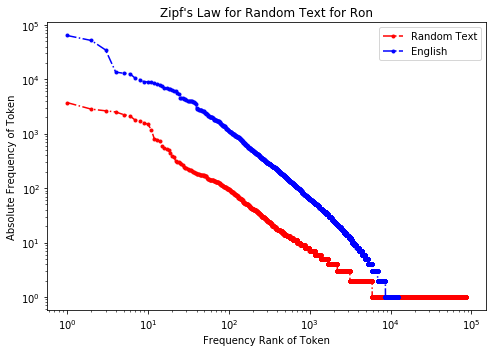

In [256]:
x_range = len(r_dict)
y_range = list(sorted(r_dict.values(), reverse=True))
# Plot and compare with the first English text used in 1.1 (The Holy Bible)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency Rank of Token')
plt.ylabel('Absolute Frequency of Token')
plt.title("Zipf's Law for Random Text for Ron")
plt.tight_layout()
one, = plt.plot(range(1,x_range+1),y_range,'-..',color='red',label='Random Text')
two, = plt.plot(range(1,en_x_range+1),en_y_range,'-..',color='blue', label='English')
plt.legend(handles=[one,two,])
plt.show()

## Showing probability distribution of the text generated.

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
[0.13221476510067115, 0.008053691275167786, 0.009395973154362415, 0.04429530201342282, 0.1483221476510067, 0.019463087248322148, 0.012080536912751677, 0.07583892617449664, 0.06577181208053691, 0.0013422818791946308, 0.006711409395973154, 0.032214765100671144, 0.020134228187919462, 0.06442953020134229, 0.07785234899328859, 0.008053691275167786, 0.0, 0.04697986577181208, 0.05771812080536913, 0.10738255033557047, 0.02080536912751678, 0.004026845637583893, 0.019463087248322148, 0.0006711409395973154, 0.016778523489932886, 0.0]


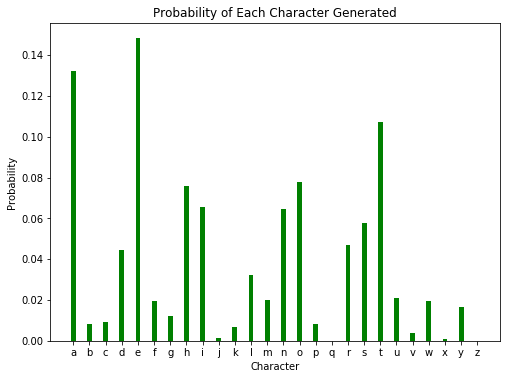

In [257]:
text = ""
for w in list_words:
    text += w
total = len(text)
dict_counts = {}
count_ch = []
list_ch = list(string.ascii_lowercase )
#print(list_ch)
#print(set(text))
for c in list_ch:
    dict_counts[c] = text.count(c) / total
    count_ch.append(text.count(c) / total)
#print((dict_counts))
#print(count_ch)
print(list_ch)
print(count_ch)
plt.bar(range(len(list_ch)),count_ch,width=0.3,color='green')
plt.tight_layout()
plt.xlabel('Character')
plt.ylabel('Probability')
plt.xticks(range(len(list_ch)),list_ch)
plt.title('Probability of Each Character Generated')
plt.show()